In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
nan = ['nan']
df= pd.read_excel(r"Online Retail.xlsx", na_values=nan)

In [3]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.drop(columns=['InvoiceNo','CustomerID'],axis=1,inplace=True)

In [6]:
df.columns

Index(['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country'],
      dtype='object')

In [7]:
df.head(2)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom


In [8]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [9]:
df.isnull().sum()

StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [10]:
df.shape

(541909, 6)

In [11]:
for i in df.columns:  
    print(i)
    print('_'*20)
    print(df[i].unique())
    print('*'*65)
    print('\n')

StockCode
____________________
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
*****************************************************************


Description
____________________
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
*****************************************************************


Quantity
____________________
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   

In [12]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
ASSORTED COLOUR BIRD ORNAMENT          1501
SET OF 3 CAKE TINS PANTRY DESIGN       1473
PACK OF 72 RETROSPOT CAKE CASES        1385
LUNCH BAG  BLACK SKULL.                1350
NATURAL SLATE HEART CHALKBOARD         1280
POSTAGE                                1252
JUMBO BAG PINK POLKADOT                1251
HEART OF WICKER SMALL                  1237
JAM MAKING SET WITH JARS               1229
JUMBO STORAGE BAG SUKI                 1214
PAPER CHAIN KIT 50'S CHRISTMAS         1210
JUMBO SHOPPER VINTAGE RED PAISLEY      1202
LUNCH BAG CARS BLUE                    1197
LUNCH BAG SPACEBOY DESIGN              1192
JAM MAKING SET PRINTED                 1182
RECIPE BOX PANTRY YELLOW DESIGN        1180
SPOTTY BUNTING                         1172
LUNCH BAG SUKI DESIG

In [13]:
null= [var for var in df.columns if df[var].isnull().sum()>0]
null

['Description']

In [14]:
df['Description'].isnull().sum()/df['Description'].shape[0]

0.002683107311375157

In [15]:
df['Description'].isnull().sum()

1454

In [16]:
#df.reset_index(drop=True, inplace=True)

In [17]:
df.head(2)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom


In [18]:
df["StockCode"] = df["StockCode"].astype(str) 

In [19]:
df["Description"] = df["Description"].astype(str) 

### If I did not convert it to str and did not use .str.replace() --> the mode()[0] would not work. Solved the problem.

In [20]:
null = ['Description']
category = ['StockCode']

for description,stock_code in zip(null, category):
    for uniq in df[stock_code].unique():
        df.update(df[df.loc[:,stock_code]==uniq][description].str.replace('nan', df[df.loc[:,stock_code]==uniq][description].mode()[0]))

In [21]:
df['Description'].isnull().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    541909 non-null  object        
 1   Description  541909 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 24.8+ MB


In [23]:
df.isnull().sum()

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [24]:
df.shape

(541909, 6)

In [25]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [26]:
promiscuous_df = df[(df['Description']=='?')              | (df['Description']=='??')              | 
                    (df['Description']=='?? missing')     | 
                    (df['Description']=='???')            | (df['Description']=='????damages????') | 
                    (df['Description']=='????missing')    | (df['Description']=='???lost')         |
                    (df['Description']=='???missing')     | (df['Description']=='?display?')       |
                    (df['Description']=='?lost')          | (df['Description']=='?missing')        | 
                    (df['Description']=='?sold as sets?') |
                    (df['Description']=='? sold as sets?')|
                    (df['Description']=='20713')          | (df['Description']=='20713 wrongly marked') |
                    (df['Description']=='crushed')        | (df['Description']=='crushed boxes')   | 
                    (df['Description']=='Dagamed')        | 
                    (df['Description']=='crushed ctn')    | (df['Description']=='Damaged')         | 
                    (df['Description']=='damaged stock')  | (df['Description']=='damages')         |
                    (df['Description']=='damages wax')    | (df['Description']=='damages/credits from ASOS.') |
                    (df['Description']=='damages/display')| (df['Description']=='damages/dotcom?') |
                    (df['Description']=='cracked')        |
                    (df['Description']=='alan hodge cant mamage this section')                     | 
                    (df['Description']=='amazon')              | 
                    (df['Description']=='amazon adjust')       | 
                    (df['Description']=='?Amazon Adjustment')  | 
                    (df['Description']=='AMAZON FEE')          | 
                    (df['Description']=='amazon sales')        | 
                    (df['Description']=='Amazon sold sets')    |
                    (df['Description']=='Bank Charges')        | 
                    (df['Description']=='barcode problem')     |
                    (df['Description']=='Breakages')           |     
                    (df['Description']=='broken')              | 
                    (df['Description']=="can't find")          |
                    (df['Description']=='check')               |
                    (df['Description']=='check?')              | 
                    (df['Description']=="Dad's Cab Electronic Meter") |
                    
                    (df['Description']=='smashed')              | 
                    (df['Description']=='Missing')              | 
                    (df['Description']=='lost')                 | 
                    (df['Description']=='mixed up')             | 
                    (df['Description']=='damages?')             | 
                    (df['Description']=='wet boxes')            | 
                    (df['Description']=='wet')                  |
                    (df['Description']=='Dotcom')               | 
                    (df['Description']=='Found')                |
                    (df['Description']=='CHECK')                | 
                    (df['Description']=='damaged')              | 
                    (df['Description']=='lost??')               |
                    (df['Description']=='wet?')                 |
                    (df['Description']=='lost in space')        | 
                    (df['Description']=='wet pallet')           |
                    (df['Description']=='Dotcom')               | 
                    (df['Description']=='rusty throw away')     | 
                    (df['Description']=='rusty thrown away')    | 
                    (df['Description']=='sold with wrong barcode')         | 
                    (df['Description']=='John Lewis')           | 
                    (df['Description']=='Adjustment')           | 
                    (df['Description']=='wet rusty')            |
                    (df['Description']=='wrongly marked carton 22804')     | 
                    (df['Description']=='Wrongly mrked had 85123a in box') |
                    (df['Description']=='Water damaged')        | 
                    (df['Description']=='had been put aside')   |
                    (df['Description']=='Dotcom sales')         |
                    
                    (df['Description']=='Unsaleable, destroyed.')          | 
                    (df['Description']=='CHECK')                | 
                    (df['Description']=='Damages')              | 
                    (df['Description']=='wrongly coded 20713')  | 
                    (df['Description']=='wrongly coded 23343')  | 
                    (df['Description']=='Marked as 23343')      | 
                    (df['Description']=='re-adjustment')        |
                    (df['Description']=='wrongly marked 23343') | 
                    (df['Description']=='Dotcom')               |
                    (df['Description']=='Had been put aside.')  | 
                    (df['Description']=='Wet pallet-thrown away') | 
                    (df['Description']=='mouldy')               |
                    (df['Description']=='WET/MOULDY')           |
                    (df['Description']=='stock check')          | 
                    (df['Description']=='counted')              |
                    (df['Description']=='wrongly coded-23343')  | 
                    (df['Description']=='wrongly coded 20713')  | 
                    (df['Description']=='michel oops')          | 
                    (df['Description']=='Incorrect stock entry.') | 
                    (df['Description']=='Lighthouse Trading zero invc')    | 
                    (df['Description']==' incorr')              | 
                    (df['Description']=='incorr')               |
                    (df['Description']=='historic computer ')   | 
                    (df['Description']=='difference?....se')    |
                    (df['Description']=='website fixed')        | 
                    (df['Description']=='thrown away')          |
                    (df['Description']=='Found in w/hse')       |
                    
                    (df['Description']=='OOPS ! adjustment')          | 
                    (df['Description']=='test')                       | 
                    (df['Description']=='temp adjustment')            | 
                    (df['Description']=='Crushed')                    | 
                    (df['Description']=='sold as 1')                  | 
                    (df['Description']=='code mix up? 84930')         | 
                    (df['Description']=='taig adjust no stock')       |
                    (df['Description']=='Sold as 1 on dotcom')        | 
                    (df['Description']=='Damages/samples')            |
                    (df['Description']=='incorrectly put back into stock')       | 
                    (df['Description']=='ebay')                       | 
                    (df['Description']=='stock creditted wrongly')    |
                    (df['Description']=='came coded as 20713')        |
                    (df['Description']=='wrongly marked. 23343 in box')          | 
                    (df['Description']=='mouldy, unsaleable.')        |
                    (df['Description']=='mix up with c')              | 
                    (df['Description']=='Show Samples')               | 
                    (df['Description']=='found some more on shelf')   | 
                    (df['Description']=='Printing smudges/thrown away') | 
                    (df['Description']=='sold as set by dotcom')      | 
                    (df['Description']==' water damage')              | 
                    (df['Description']=='sold as set on dotcom')      |
                    (df['Description']=='sold as set on dotcom and amazon')       | 
                    (df['Description']=='wet damaged')                |
                    (df['Description']=='incorrectly credited C550456 see 47')    | 
                    (df['Description']=='reverse previous adjustment')|
                    (df['Description']=='incorrectly credited C550456 see 47')    |

                    (df['Description']=='on cargo order')             |
                    (df['Description']== 'wet/rusty')                 |
                    (df['Description']=='sold as set/6 by dotcom')    |
                    (df['Description']=='Thrown away-rusty')          |
                    (df['Description']=='Not rcvd in 10/11/2010 delivery')|
                    (df['Description']=='mailout')                    |
                    (df['Description']=='SAMPLES')                    |
                    (df['Description']=='damages/showroom etc')       |
                    (df['Description']=='adjust')                     |
                    (df['Description']=='Adjustment')                 |
                    (df['Description']=='wrong code')                 |
                    (df['Description']=='wrong code?')                |
                    (df['Description']=='Display')                    |
                    (df['Description']=='did  a credit  and did not tick ret')|
                    (df['Description']=='POSSIBLE DAMAGES OR LOST?')  |
                    (df['Description']=='mystery! Only ever imported 1800')|
                    (df['Description']=='sold as 22467')              |
                    (df['Description']=='sold in set?')               |
                    (df['Description']=="Dotcom sold in 6's")         |
                    (df['Description']=='re dotcom quick fix.')       |
                    (df['Description']=='rcvd be air temp fix for dotcom sit')|
                    (df['Description']=="thrown away-can't sell")     |
                    (df['Description']=="thrown away-can't sell.")    |
                    (df['Description']=='wrong barcode')              |
                    (df['Description']=='wrongly sold (22719) barcode')|
                    (df['Description']=='wrong barcode (22467)')      |
                    (df['Description']=='throw away')                 |
                    (df['Description']=='thrown away')                |
                    (df['Description']=='Thrown away.')               |
                    (df['Description']=='wrongly sold sets')          |
                    (df['Description']=='dotcom sold sets')           |
                    (df['Description']=='wrongly sold as sets')       |
                    (df['Description']=='Dotcom set')                 |
                    (df['Description']=='showroom')                   |
                    (df['Description']=='incorrectly made-thrown away.')|
                    (df['Description']=='samples/damages')            |
                    (df['Description']=='label mix up')               |
                    (df['Description']=='Dotcom')                     |
                    (df['Description']=='Given away')                 |
                    (df['Description']=='counted')                    |
                    (df['Description']=='mouldy, thrown away.')       |
                    (df['Description']=='reverse 21/5/10 adjustment') |
                    (df['Description']=='Dotcom sales')               |
                    (df['Description']=='faulty')                     |
                    (df['Description']=='taig adjust')                |
                    (df['Description']=='Dotcom')                     |
                    (df['Description']=='had been put aside')         |
                    (df['Description']=='wrongly marked')             |
                    (df['Description']=='dotcom adjust')              |
                    (df['Description']=='to push order througha s stock was')|
                    (df['Description']=='found box')                  |
                    (df['Description']=='Dotcom')                     |
                    (df['Description']=='dotcomstock')                |
                    (df['Description']=='Sale error')                 |
                    (df['Description']=="allocate stock for dotcom orders ta")|
                    (df['Description']=='Amazon')                     |
                    (df['Description']=='add stock to allocate online orders')|
                    (df['Description']=='returned')                   |
                    (df['Description']=='DOTCOM POSTAGE')             |
                    (df['Description']=='Manual')                     |
                    (df['Description']=='Found by jackie')            |
                    (df['Description']=='Amazon Adjustment')          |
                    (df['Description']=='Manual')                     |
                    (df['Description']=='for online retail orders')   |
                    (df['Description']=='taig adjust')                |
                    (df['Description']=='test')                       |
                    (df['Description']=='Manual')                     |
                    (df['Description']=='adjustment')                 |
                    (df['Description']=='Adjust bad debt')            |
                    (df['Description']=='AMAZON')                     |
                    (df['Description']=='wrongly sold as sets')       |
                    (df['Description']=='Discount')                   |
                    (df['Description']=='DAMAGED')
                    ]

In [27]:
df = df[(df['Description']!='adjustment')]
df =  df[(df['Description']!='Adjust bad debt')]
df = df[(df['Description']!='AMAZON')]
df = df[(df['Description']!='?')]
df =  df[(df['Description']!='??')]
df = df[(df['Description']!='?? missing')]
df = df[(df['Description']!='???')]
df = df[(df['Description']!='????damages????')] 
df = df[(df['Description']!='????missing')]    
df = df[(df['Description']!='???lost')]         
df = df[(df['Description']!='???missing')]     
df = df[(df['Description']!='?display?') ]     
df = df[(df['Description']!='?lost')]       
df = df[(df['Description']!='?missing')]        
df = df[(df['Description']!='?sold as sets?')]
df = df[(df['Description']!='? sold as sets?')]
df = df[(df['Description']!='20713')]          
df = df[(df['Description']!='20713 wrongly marked')] 
df = df[(df['Description']!='crushed')]        
df = df[(df['Description']!='crushed boxes')]   
df = df[(df['Description']!='Dagamed')]        
df = df[(df['Description']!='crushed ctn')]    
df = df[(df['Description']!='Damaged')]         
df = df[(df['Description']!='damaged stock')]  
df = df[(df['Description']!='damages')]        
df = df[(df['Description']!='damages wax') ]   
df = df[(df['Description']!='damages/credits from ASOS.')]
df = df[(df['Description']!='damages/display')]
df = df[(df['Description']!='damages/dotcom?')]
df = df[(df['Description']!='cracked') ]       
df = df[(df['Description']!='alan hodge cant mamage this section')]                     
df = df[(df['Description']!='amazon')]              
df = df[(df['Description']!='amazon adjust') ]      
df = df[(df['Description']!='?Amazon Adjustment')  ]
df = df[(df['Description']!='AMAZON FEE')]          
df = df[(df['Description']!='amazon sales')]        
df = df[(df['Description']!='Amazon sold sets')]    
df = df[(df['Description']!='Bank Charges')]        
df = df[(df['Description']!='barcode problem')]     
df = df[(df['Description']!='Breakages')]              
df = df[(df['Description']!='broken')]              
df = df[(df['Description']!="can't find")]          
df = df[(df['Description']!='check')]               
df = df[(df['Description']!='check?')]              
df = df[(df['Description']!="Dad's Cab Electronic Meter")]       
                    
df = df[(df['Description']!='smashed')]              
df = df[(df['Description']!='Missing')]              
df = df[(df['Description']!='lost')]               
df = df[(df['Description']!='mixed up')]         
df = df[(df['Description']!='damages?')]          
df = df[(df['Description']!='wet boxes')]       
df = df[(df['Description']!='wet')]             
df = df[(df['Description']!='Dotcom')]            
df = df[(df['Description']!='Found')]            
df = df[(df['Description']!='CHECK')]             
df = df[(df['Description']!='damaged')]           
df = df[(df['Description']!='lost??')]           
df = df[(df['Description']!='wet?')]            
df = df[(df['Description']!='lost in space')]       
df = df[(df['Description']!='wet pallet')]           
df = df[(df['Description']!='Dotcom')]             
df = df[(df['Description']!='rusty throw away')]   
df = df[(df['Description']!='rusty thrown away')]   
df = df[(df['Description']!='sold with wrong barcode')]     
df = df[(df['Description']!='John Lewis')]        
df = df[(df['Description']!='Adjustment')]         
df = df[(df['Description']!='wet rusty')]        
df = df[(df['Description']!='wrongly marked carton 22804')]    
df = df[(df['Description']!='Wrongly mrked had 85123a in box')] 
df = df[(df['Description']!='Water damaged')]      
df = df[(df['Description']!='had been put aside')]   
df = df[(df['Description']!='Dotcom sales')]       
                    
df = df[(df['Description']!='Unsaleable, destroyed.')]      
df = df[(df['Description']!='CHECK') ]               
df = df[(df['Description']!='Damages')]              
df = df[(df['Description']!='wrongly coded 20713')]   
df = df[(df['Description']!='wrongly coded 23343')]   
df = df[(df['Description']!='Marked as 23343') ]      
df = df[(df['Description']!='re-adjustment')]       
df = df[(df['Description']!='wrongly marked 23343')]  
df = df[(df['Description']!='Dotcom')]              
df = df[(df['Description']!='Had been put aside.')] 
df = df[(df['Description']!='Wet pallet-thrown away')] 
df = df[(df['Description']!='mouldy')]            
df = df[(df['Description']!='WET/MOULDY')]         
df = df[(df['Description']!='stock check')]         
df = df[(df['Description']!='counted')]            
df = df[(df['Description']!='wrongly coded-23343')]   
df = df[(df['Description']!='wrongly coded 20713')]   
df = df[(df['Description']!='michel oops')]         
df = df[(df['Description']!='Incorrect stock entry.')]  
df = df[(df['Description']!='Lighthouse Trading zero invc')]    
df = df[(df['Description']!=' incorr')]              
df = df[(df['Description']!='incorr')]             
df = df[(df['Description']!='historic computer ')]    
df = df[(df['Description']!='difference?....se')]    
df = df[(df['Description']!='website fixed')]       
df = df[(df['Description']!='thrown away')]         
df = df[(df['Description']!='Found in w/hse')]      
                    
df = df[(df['Description']!='OOPS ! adjustment')]          
df = df[(df['Description']!='test')]               
df = df[(df['Description']!='temp adjustment')]             
df = df[(df['Description']!='Crushed')]                
df = df[(df['Description']!='sold as 1')]                 
df = df[(df['Description']!='code mix up? 84930')]        
df = df[(df['Description']!='taig adjust no stock')]      
df = df[(df['Description']!='Sold as 1 on dotcom')]        
df = df[(df['Description']!='Damages/samples')]         
df = df[(df['Description']!='incorrectly put back into stock')]        
df = df[(df['Description']!='ebay')]              
df = df[(df['Description']!='stock creditted wrongly')]   
df = df[(df['Description']!='came coded as 20713')]     
df = df[(df['Description']!='wrongly marked. 23343 in box')]          
df = df[(df['Description']!='mouldy, unsaleable.')]      
df = df[(df['Description']!='mix up with c')]            
df = df[(df['Description']!='Show Samples')]              
df = df[(df['Description']!='found some more on shelf')]  
df = df[(df['Description']!='Printing smudges/thrown away')] 
df = df[(df['Description']!='sold as set by dotcom')]     
df = df[(df['Description']!=' water damage')]             
df = df[(df['Description']!='sold as set on dotcom')]     
df = df[(df['Description']!='sold as set on dotcom and amazon')]     
df = df[(df['Description']!='wet damaged')]               
df = df[(df['Description']!='incorrectly credited C550456 see 47')]     
df = df[(df['Description']!='reverse previous adjustment')]
df = df[(df['Description']!='incorrectly credited C550456 see 47')]   

df = df[(df['Description']!='on cargo order')]             
df = df[(df['Description']!= 'wet/rusty')]               
df = df[(df['Description']!='sold as set/6 by dotcom')]  
df = df[(df['Description']!='Thrown away-rusty')]       
df = df[(df['Description']!='Not rcvd in 10/11/2010 delivery')]
df = df[(df['Description']!='mailout')]                  
df = df[(df['Description']!='SAMPLES')]                  
df = df[(df['Description']!='damages/showroom etc')]     
df = df[(df['Description']!='adjust')]             
df = df[(df['Description']!='Adjustment')]                 
df = df[(df['Description']!='wrong code')]               
df = df[(df['Description']!='wrong code?')]               
df = df[(df['Description']!='Display')]                
df = df[(df['Description']!='did  a credit  and did not tick ret')]
df = df[(df['Description']!='POSSIBLE DAMAGES OR LOST?')] 
df = df[(df['Description']!='mystery! Only ever imported 1800')]
df = df[(df['Description']!='sold as 22467')]            
df = df[(df['Description']!='sold in set?')]            
df = df[(df['Description']!="Dotcom sold in 6's")]        
df = df[(df['Description']!='re dotcom quick fix.')]      
df = df[(df['Description']!='rcvd be air temp fix for dotcom sit')]
df = df[(df['Description']!="thrown away-can't sell")]    
df = df[(df['Description']!="thrown away-can't sell.")]    
df = df[(df['Description']!='wrong barcode')]      
df = df[(df['Description']!='wrongly sold (22719) barcode')]
df = df[(df['Description']!='wrong barcode (22467)')]   
df = df[(df['Description']!='throw away')]        
df = df[(df['Description']!='thrown away')]      
df = df[(df['Description']!='Thrown away.')]       
df = df[(df['Description']!='wrongly sold sets')]       
df = df[(df['Description']!='dotcom sold sets')]       
df = df[(df['Description']!='Dotcom set')]           
df = df[(df['Description']!='showroom') ]                  
df = df[(df['Description']!='incorrectly made-thrown away.')]
df = df[(df['Description']!='samples/damages')]            
df = df[(df['Description']!='label mix up')]               
df = df[(df['Description']!='Dotcom')]                    
df = df[(df['Description']!='Given away')]                 
df = df[(df['Description']!='counted')]                  
df = df[(df['Description']!='mouldy, thrown away.')]       
df = df[(df['Description']!='reverse 21/5/10 adjustment')]
df = df[(df['Description']!='Dotcom sales')]               
df = df[(df['Description']!='faulty')]                  
df = df[(df['Description']!='taig adjust')]               
df = df[(df['Description']!='Dotcom')]              
df = df[(df['Description']!='had been put aside')]         
df = df[(df['Description']!='wrongly marked')]            
df = df[(df['Description']!='dotcom adjust')]             
df = df[(df['Description']!='to push order througha s stock was')]
df = df[(df['Description']!='found box')]            
df = df[(df['Description']!='Dotcom')]                 
df = df[(df['Description']!='dotcomstock')]               
df = df[(df['Description']!='Sale error')]              
df = df[(df['Description']!="allocate stock for dotcom orders ta")]
df = df[(df['Description']!='Amazon')]              
df = df[(df['Description']!='add stock to allocate online orders')]
df = df[(df['Description']!='returned')]                  
df = df[(df['Description']!='DOTCOM POSTAGE')]            
df = df[(df['Description']!='Manual')]                
df = df[(df['Description']!='Found by jackie')]            
df = df[(df['Description']!='Amazon Adjustment')]         
df = df[(df['Description']!='Manual')]            
df = df[(df['Description']!='for online retail orders')]   
df = df[(df['Description']!='taig adjust')]              
df = df[(df['Description']!='test')]                       
df = df[(df['Description']!='Manual')]    
df = df[(df['Description']!='wrongly sold as sets')]       
df = df[(df['Description']!='Discount')]                   
df = df[(df['Description']!='DAMAGED')]

In [28]:
promiscuous_df.shape

(2087, 6)

In [29]:
df.shape

(539822, 6)

In [30]:
promiscuous_df['Description'].unique()

array(['Discount', 'DOTCOM POSTAGE', 'Manual', 'Bank Charges', 'amazon',
       '?', 'check', 'damages', "Dad's Cab Electronic Meter", 'SAMPLES',
       'AMAZON FEE', 'faulty', 'Dotcom sales', 'amazon sales', 'Found',
       'reverse 21/5/10 adjustment', 'mouldy, thrown away.', 'counted',
       'Given away', 'Dotcom', 'label mix up', 'samples/damages',
       'thrown away', 'incorrectly made-thrown away.', 'showroom',
       'Adjustment', 'Dotcom set', 'wrongly sold as sets',
       'Amazon sold sets', 'dotcom sold sets', 'wrongly sold sets',
       '? sold as sets?', '?sold as sets?', 'Thrown away.',
       'damages/display', 'damaged stock', 'broken', 'throw away',
       'wrong barcode (22467)', 'wrongly sold (22719) barcode',
       'wrong barcode', 'barcode problem', '?lost',
       "thrown away-can't sell.", "thrown away-can't sell",
       'rcvd be air temp fix for dotcom sit', 'damages?',
       're dotcom quick fix.', "Dotcom sold in 6's", 'sold in set?',
       'cracked', 's

In [31]:
promiscuous_df['Description'].head()

141           Discount
1814    DOTCOM POSTAGE
2239            Manual
2250            Manual
3041    DOTCOM POSTAGE
Name: Description, dtype: object

In [32]:
for var in promiscuous_df['Description'].unique():
    promiscuous_df["Description"] = promiscuous_df['Description'].replace(var, 'EXPENSES')


In [33]:
promiscuous_df['Description'].unique()

array(['EXPENSES'], dtype=object)

In [34]:
promiscuous_df.head(2)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
141,D,EXPENSES,-1,2010-12-01 09:41:00,27.50,United Kingdom
1814,DOT,EXPENSES,1,2010-12-01 14:32:00,569.77,United Kingdom


In [35]:
Boombox_df = df[(df['Description']=='*Boombox Ipod Classic')]

Boombox_df["Description"] = Boombox_df['Description'].replace('*Boombox Ipod Classic', 'Boombox Ipod Classic')

In [36]:
df = df[(df['Description']!='*Boombox Ipod Classic')]

In [37]:
MirrorBall_df = df[(df['Description']=='*USB Office Mirror Ball')]

MirrorBall_df["Description"] = MirrorBall_df['Description'].replace('*USB Office Mirror Ball', 'USB Office Mirror Ball')

In [38]:
df = df[(df['Description']!='*USB Office Mirror Ball')]

In [39]:
df = pd.concat([df,Boombox_df,MirrorBall_df,],axis=0)

In [40]:
df.shape

(539822, 6)

In [41]:
df = pd.concat([df,promiscuous_df],axis=0)

In [42]:
df.shape

(541909, 6)

In [43]:
df['Sales'] = df['Quantity']*df['UnitPrice']

In [44]:
all_na = df[(df['Description']=='nan')]

In [45]:
df.shape

(541909, 7)

In [46]:
df.head(2)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [47]:
df = df[(df['Description']!='nan')]

In [48]:
df.shape

(541770, 7)

In [49]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,Sales
count,541770.000000,541770,541770.000000,541770.000000
mean,9.554093,2011-07-04 14:15:52.930838016,4.612297,17.992410
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-168469.600000
25%,1.000000,2011-03-28 11:36:00,1.250000,3.400000
50%,3.000000,2011-07-20 10:08:00,2.080000,9.750000
75%,10.000000,2011-10-19 11:41:00,4.130000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,218.101932,NaN,96.772237,378.859306


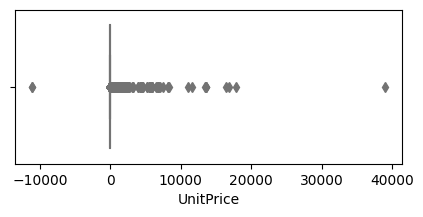

In [50]:
plt.figure(figsize=(5,2))

sb.boxplot(x='UnitPrice',data=df,palette='cool')

plt.show()

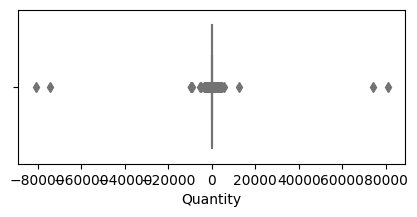

In [51]:
plt.figure(figsize=(5,2))

sb.boxplot(x='Quantity',data=df,palette='cool')

plt.show()

In [52]:
df_copy= df.copy()

In [53]:
df_copy.head(2)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [54]:
df_copy.shape

(541770, 7)

In [55]:
df_copy.describe()

,Quantity,InvoiceDate,UnitPrice,Sales
count,541770.000000,541770,541770.000000,541770.000000
mean,9.554093,2011-07-04 14:15:52.930838016,4.612297,17.992410
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-168469.600000
25%,1.000000,2011-03-28 11:36:00,1.250000,3.400000
50%,3.000000,2011-07-20 10:08:00,2.080000,9.750000
75%,10.000000,2011-10-19 11:41:00,4.130000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,218.101932,NaN,96.772237,378.859306


In [56]:
import statistics

In [57]:
statistics.stdev(df_copy['Quantity'])*3

654.3057955124805

In [58]:
df_copy = df[(df['Quantity']<(statistics.stdev(df_copy['Quantity'])*3)) & (df['Quantity']>-(statistics.stdev(df_copy['Quantity'])*3))]

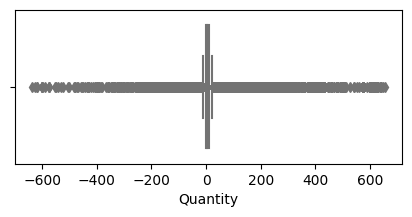

In [59]:
plt.figure(figsize=(5,2))

sb.boxplot(x='Quantity',data=df_copy,palette='cool')

plt.show()

In [60]:
df_copy = df[(df['UnitPrice']<(statistics.stdev(df_copy['UnitPrice'])*3)) & (df['UnitPrice']>-(statistics.stdev(df_copy['UnitPrice'])*3))]

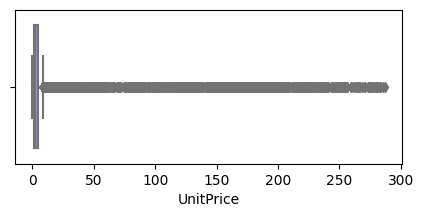

In [61]:
plt.figure(figsize=(5,2))

sb.boxplot(x='UnitPrice',data=df_copy,palette='cool')

plt.show()

In [62]:
df_copy.shape

(541392, 7)

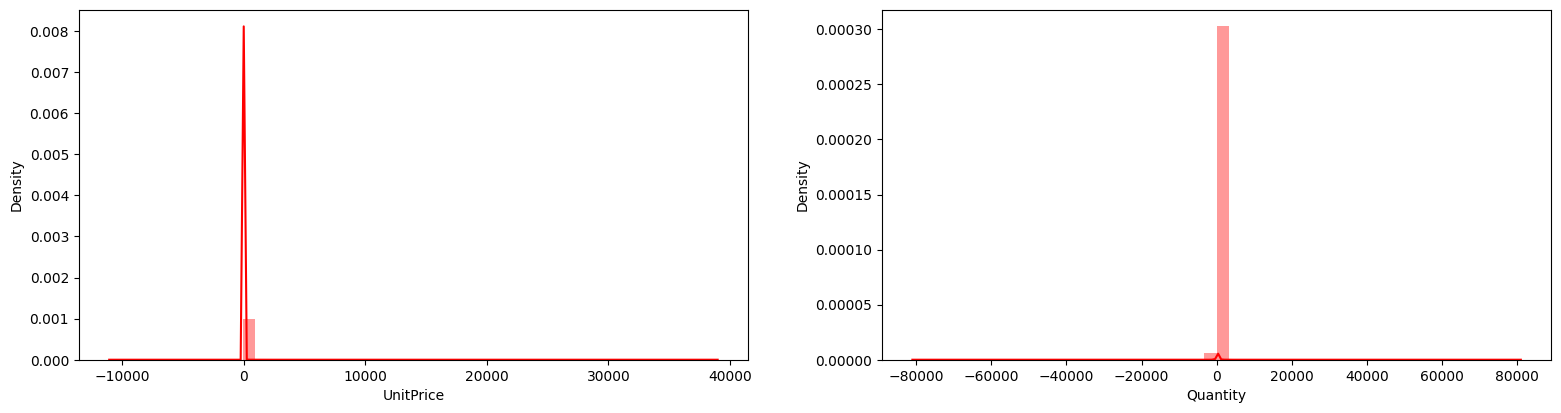

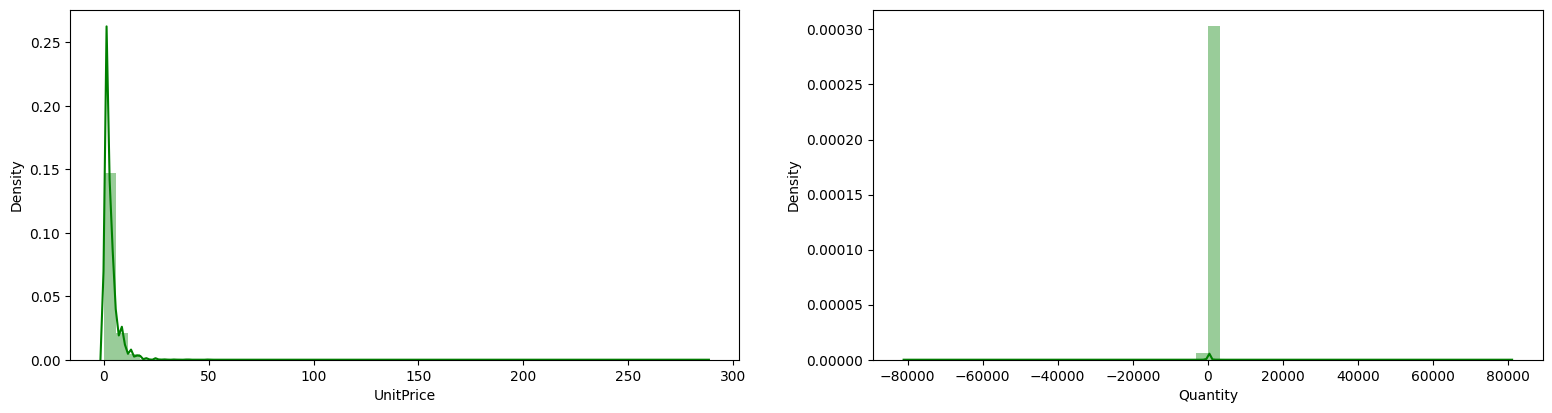

In [63]:
list1=['UnitPrice','Quantity']
plt.figure(figsize=(19,10))
for i,var in enumerate(list1):
    plt.subplot(2,2,i+1)
    sb.distplot(df[var],color='r')
    #sb.distplot(df_copy[var],color='g')
    
list1=['UnitPrice','Quantity']
plt.figure(figsize=(19,10))
for i,var in enumerate(list1):
    plt.subplot(2,2,i+1)
    #sb.distplot(df[var],color='g')
    sb.distplot(df_copy[var],color='g')

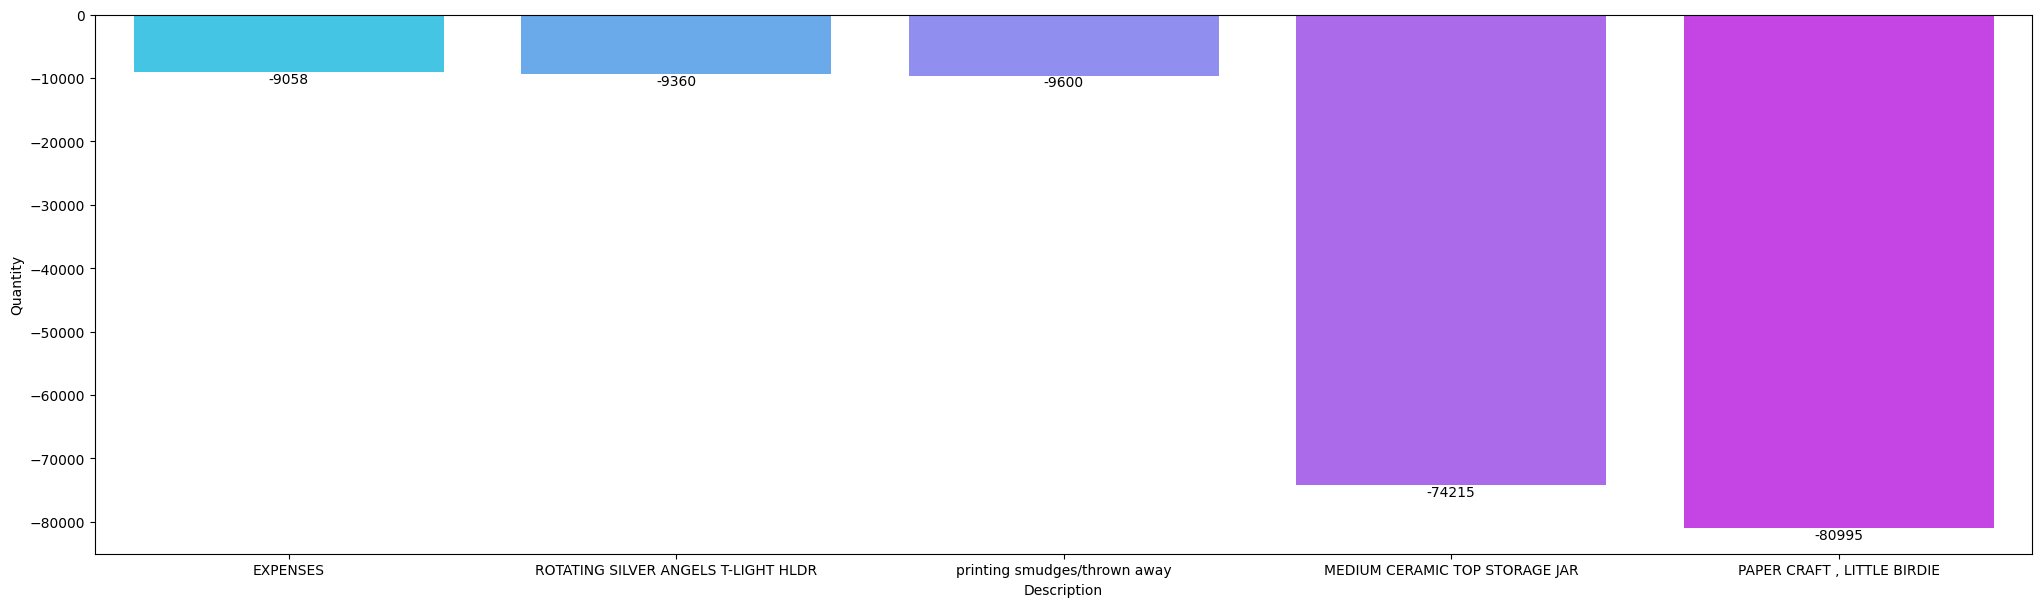

In [64]:
plt.figure(figsize=(25,7))

a = df.groupby('Description',as_index=False)['Quantity'].min().sort_values(by='Quantity',ascending=False)[-5:]
barplot=sb.barplot(x='Description',y='Quantity',data=a,palette='cool')
for var in barplot.containers:
    barplot.bar_label(var)

plt.show()

In [65]:
df.columns

Index(['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country', 'Sales'],
      dtype='object')

In [66]:
df['Month'] = df['InvoiceDate'].dt.month

In [67]:
df['Month'].head(2)

0    12
1    12
Name: Month, dtype: int32

In [68]:
df['Year'] = df['InvoiceDate'].dt.year

In [69]:
df['WeekDay'] = df['InvoiceDate'].dt.weekday

In [70]:
df['Quarter'] = df['InvoiceDate'].dt.quarter

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541770 entries, 0 to 541541
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    541770 non-null  object        
 1   Description  541770 non-null  object        
 2   Quantity     541770 non-null  int64         
 3   InvoiceDate  541770 non-null  datetime64[ns]
 4   UnitPrice    541770 non-null  float64       
 5   Country      541770 non-null  object        
 6   Sales        541770 non-null  float64       
 7   Month        541770 non-null  int32         
 8   Year         541770 non-null  int32         
 9   WeekDay      541770 non-null  int32         
 10  Quarter      541770 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(1), object(3)
memory usage: 41.3+ MB


In [72]:
df['Quarter'].unique()

array([4, 1, 2, 3])

In [73]:
df.head(2)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales,Month,Year,WeekDay,Quarter
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,12,2010,2,4
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,2010,2,4


In [74]:
UK_df = df[df['Country']=='United Kingdom']
UK_df.shape

(495339, 11)

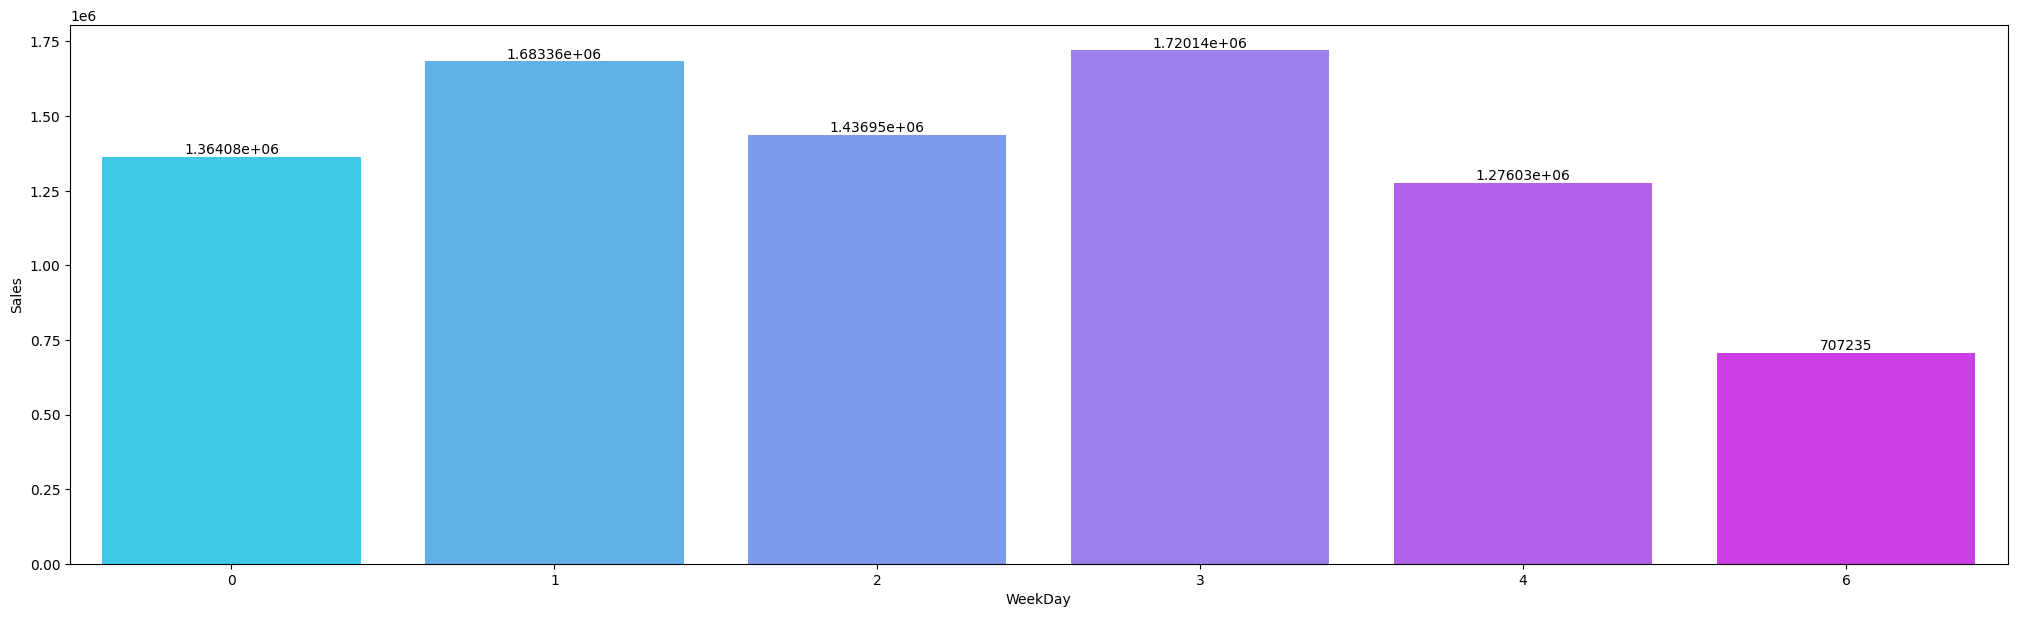

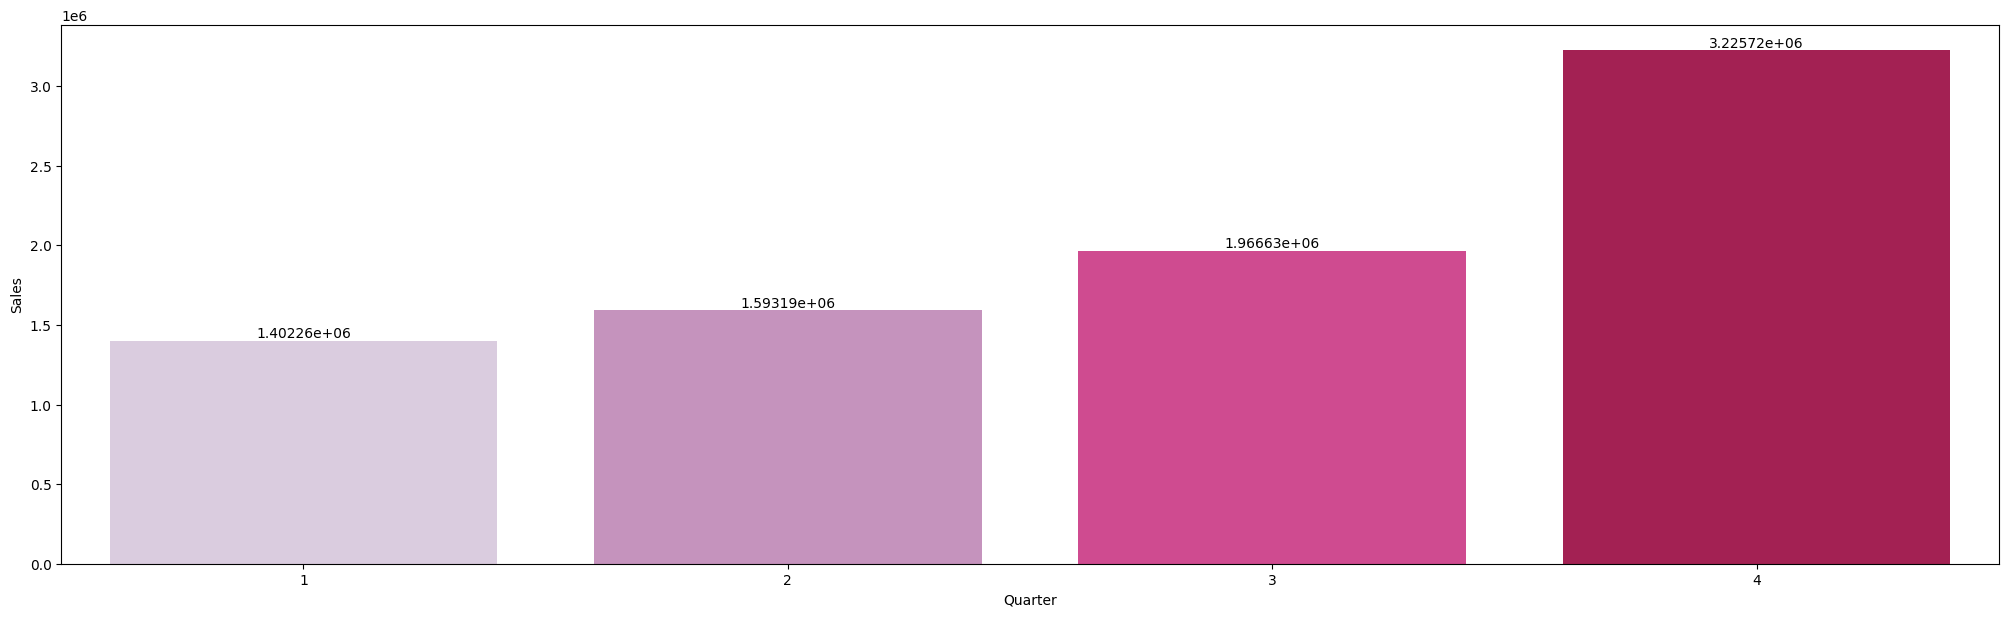

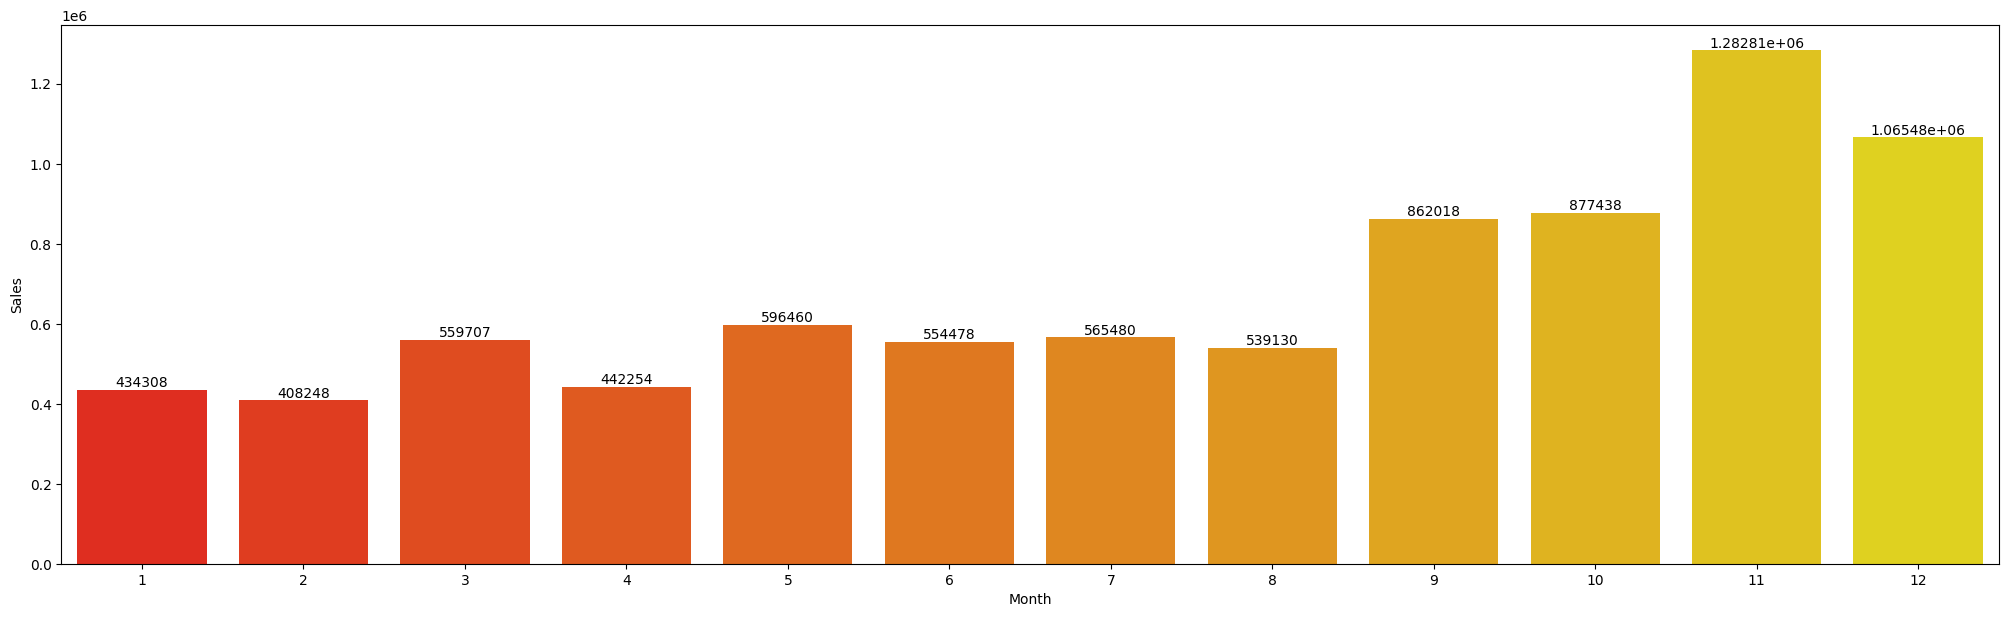

In [76]:
plt.figure(figsize=(25,7))

a = UK_df.groupby('WeekDay',as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
barplot=sb.barplot(x='WeekDay',y='Sales',data=a,palette='cool')
for var in barplot.containers:
    barplot.bar_label(var)

plt.show()


plt.figure(figsize=(25,7))

a = UK_df.groupby('Quarter',as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
barplot=sb.barplot(x='Quarter',y='Sales',data=a,palette='PuRd')
for var in barplot.containers:
    barplot.bar_label(var)

plt.show()


plt.figure(figsize=(25,7))

a = UK_df.groupby('Month',as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
barplot=sb.barplot(x='Month',y='Sales',data=a,palette='autumn')
for var in barplot.containers:
    barplot.bar_label(var)

plt.show()

In [77]:
df.columns

Index(['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country', 'Sales', 'Month', 'Year', 'WeekDay', 'Quarter'],
      dtype='object')

In [78]:
other_countries = df[df['Country']!='United Kingdom']
other_countries.shape

(46431, 11)

In [79]:
UK_df.columns

Index(['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country', 'Sales', 'Month', 'Year', 'WeekDay', 'Quarter'],
      dtype='object')

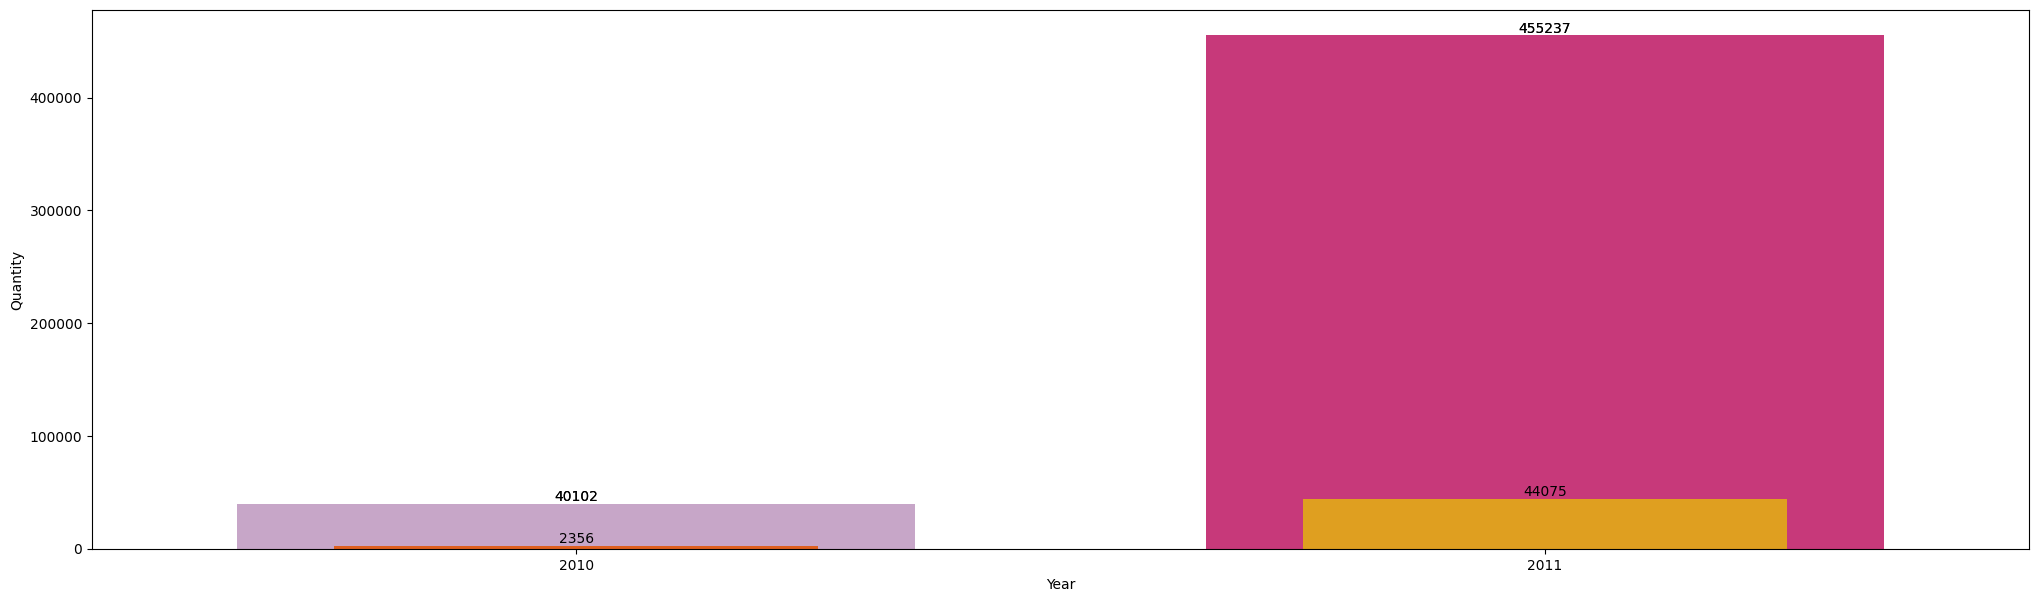

In [80]:

plt.figure(figsize=(25,7))

a = UK_df.groupby('Year',as_index=False)['Quantity'].count().sort_values(by='Quantity',ascending=False)
barplot=sb.barplot(x='Year',y='Quantity',data=a,palette='PuRd',width=0.7)
for var in barplot.containers:
    barplot.bar_label(var)


b = other_countries.groupby('Year',as_index=False)['Quantity'].count().sort_values(by='Quantity',ascending=False)
barplot=sb.barplot(x='Year',y='Quantity',data=b,palette='autumn',width=0.5)
for var1 in barplot.containers:
    barplot.bar_label(var1)

plt.show()

In [81]:
df.to_csv('S:\PROJECT\E Commerce\wrangled dataset full')